## Image Recognition


In [1]:
# Imports
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

# Others
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Image Manage
from PIL import Image
import requests
from io import BytesIO

# Image Rescale
import cv2

In [2]:
# Check TF Version
print(tf.__version__)

2.10.0


### Import Dataset

In [3]:
# Download Direct From Keras
## fashion_mnist = keras.datasets.fashion_mnist
##(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
# Previous Downloaded Data Set
fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')


### Data Exploration

In [4]:
# Spliting Train and Test Variables

## labels
train_label = np.array(fashion_train['label'])
test_label = np.array(fashion_test['label'])

## Deleting Label Column
del fashion_train['label']
del fashion_test['label']

## Images
train_images = np.array(fashion_train).reshape(60000,28,28)
test_images = np.array(fashion_test).reshape(10000,28,28)

In [58]:
# Labels Name
class_name = ['Camiseta', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo',
             'Sandalia', 'Camisa', 'Tenis', 'Bolso', 'Botines']

In [6]:
# Image Shape
train_images[0].shape

(28, 28)

In [7]:
# Train Images Shape
train_images.shape

(60000, 28, 28)

In [8]:
# Test Images Shape
test_images.shape

(10000, 28, 28)

In [9]:
# Labels
test_label[:10]

array([0, 1, 2, 2, 3, 2, 8, 6, 5, 0], dtype=int64)

In [10]:
# Min and max Values 
print('Max Value:',train_images.min())
print('Min Value:',train_images.max())

Max Value: 0
Min Value: 255


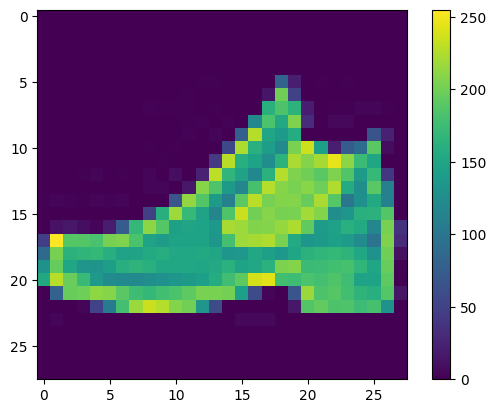

In [11]:
# Images Vizualisations
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()


### Data Pre-Proccessing

In [12]:
# Rescale the values from 0-255 to 0-1
train_images = train_images / 255
test_images = test_images / 255

In [13]:
# Min and Max Values
print('Max Value:',train_images.min())
print('Min Value:',train_images.max())

Max Value: 0.0
Min Value: 1.0


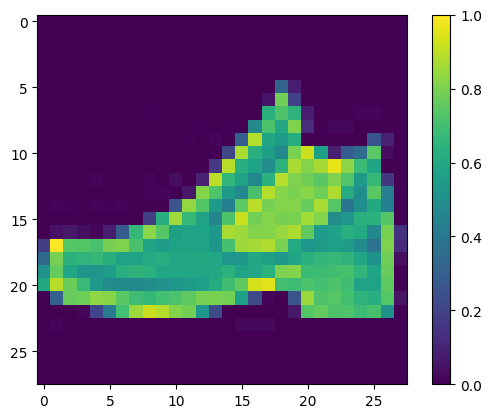

In [14]:
# Checking 
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


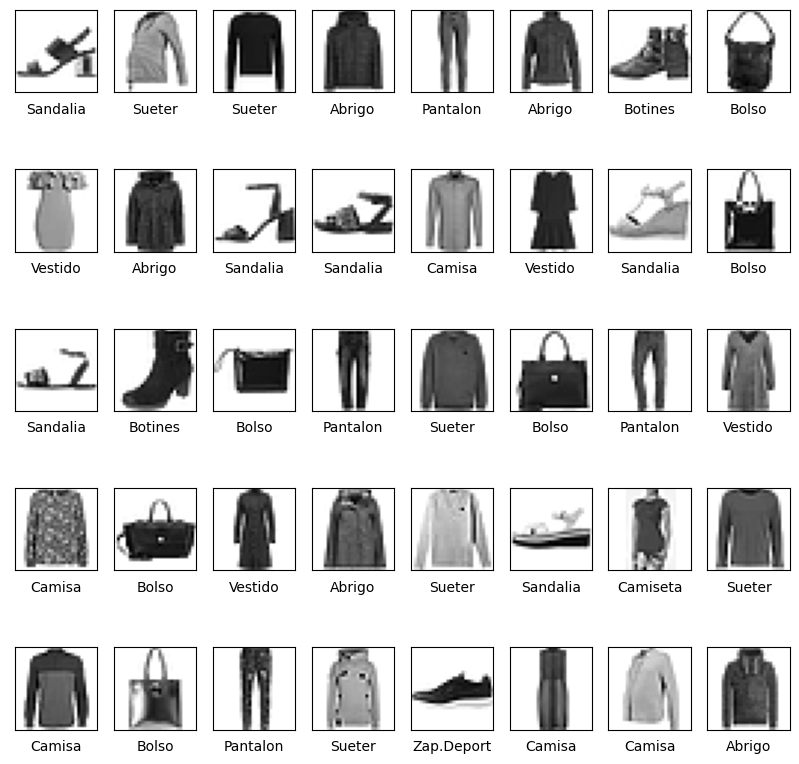

In [15]:
# Multiplot with labels
plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+50], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_label[i+50]])
    
plt.show()

### Creating Model

In [16]:
# Create the Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the Model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
# Check Point
checkpoint = 'checkpoint/check'
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint, save_weights_only=True, verbose=1)

# Tensorboard
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

# Fitting the Model
model.fit(train_images, 
          train_label, 
          epochs=15,
          validation_data = (test_images, test_label), 
          callbacks=[cp_callbacks, tensorboard_callbacks])

# Execute TensorBoard
# tensorboard --logdir logs/fit

Epoch 1/15
1865/1875 [============================>.] - ETA: 0s - loss: 0.5008 - accuracy: 0.8247
Epoch 1: saving model to checkpoint\check
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5003 - accuracy: 0.8248 - val_loss: 0.4739 - val_accuracy: 0.8242
Epoch 2/15
1865/1875 [============================>.] - ETA: 0s - loss: 0.3780 - accuracy: 0.8643
Epoch 2: saving model to checkpoint\check
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3776 - accuracy: 0.8645 - val_loss: 0.3733 - val_accuracy: 0.8630
Epoch 3/15
1872/1875 [============================>.] - ETA: 0s - loss: 0.3402 - accuracy: 0.8776
Epoch 3: saving model to checkpoint\check
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3400 - accuracy: 0.8776 - val_loss: 0.3624 - val_accuracy: 0.8714
Epoch 4/15
1859/1875 [============================>.] - ETA: 0s - loss: 0.3168 - accuracy: 0.8836
Epoch 4: saving model to checkpoint\check
1875/1875 [=============================

In [19]:
# Evaluating the Model
test_loss, test_acc = model.evaluate(test_images, test_label)
print('Precision ->',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3150 - accuracy: 0.8898
Precision -> 0.8898000121116638


In [20]:
# Prediction
y_prediction = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [21]:
y_prediction[0]

array([9.7622013e-01, 3.6700146e-11, 1.2497178e-03, 1.3054835e-06,
       1.0034828e-06, 5.0808748e-09, 2.2526994e-02, 4.6877314e-14,
       7.6485662e-07, 9.9052494e-13], dtype=float32)

In [22]:
np.argmax(y_prediction[0])

0

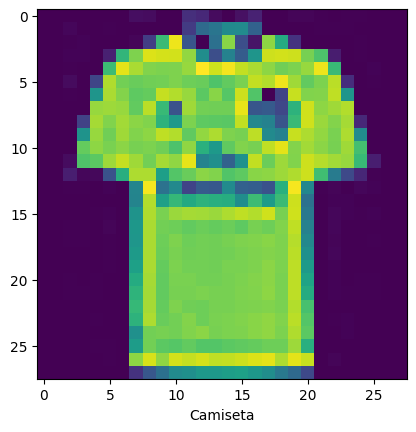

In [23]:
# Prediction Visualization
plt.imshow(test_images[0])
plt.xlabel('{}'.format(class_name[np.argmax(y_prediction[0])]))
    
plt.show()

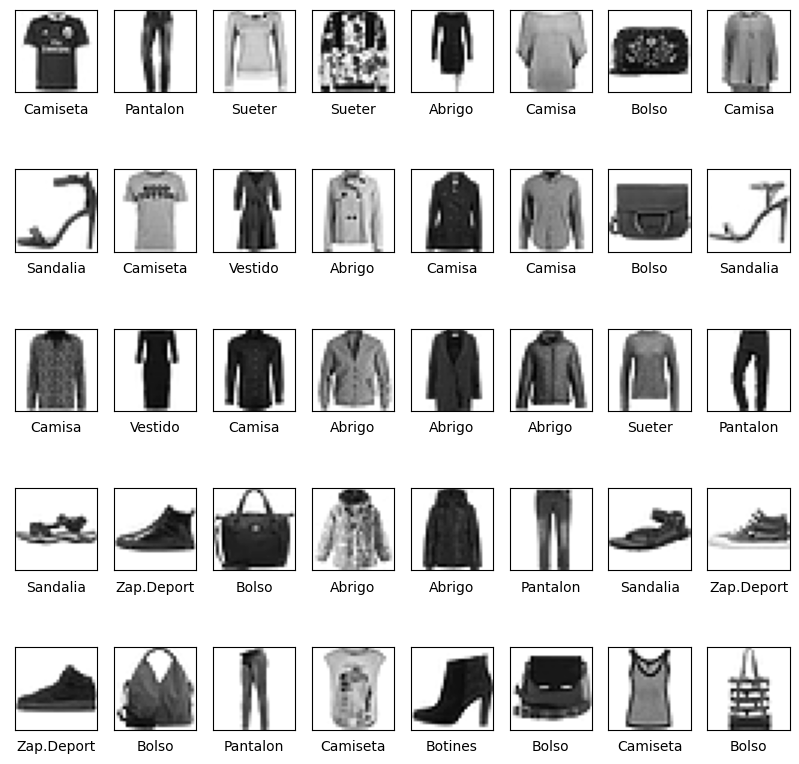

In [24]:
# Multiplot with labels
plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[np.argmax(y_prediction[i])])
    
plt.show()

In [48]:
# Load an external image
img1 = Image.open('Prediction_Data/abrigo.jpg')
img2 = Image.open('Prediction_Data/abrigo2.jpg')
img3 = Image.open('Prediction_Data/tenis.jpg')
img4 = Image.open('Prediction_Data/Botas2.jpg')
img5 = Image.open('Prediction_Data/camisa.jpg')
img6 = Image.open('Prediction_Data/ManCityShirt.jpg')
img7 = Image.open('Prediction_Data/pantalon1.jpg')
img8 = Image.open('Prediction_Data/bolso.jpg')
img9 = Image.open('Prediction_Data/vestido2.jpg')


In [50]:
# Image List
original_images_list = [np.array(img1),np.array(img2),np.array(img3),
                        np.array(img4),np.array(img5),np.array(img6),
                        np.array(img7),np.array(img8),np.array(img9),]

images_list = list(original_images_list)

In [51]:
# RGB to Gray Image
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [52]:
# Proccesing Images
def ProccessImag(img_list):
    img_list = list(img_list) 
    p_list = []
    for item in img_list:  
        # Set Negative
        item = 255 - item
        # RGB to Gray
        item = rgb2gray(item)
        # ReSize
        item = cv2.resize(item,dsize=(28,28), interpolation=cv2.INTER_CUBIC)
        # ReScale Values
        item = item / 255
        p_list.append(item)
    return p_list    

In [53]:
# Appling the Image Proccessing
images_list = ProccessImag(images_list)

In [54]:
# Prediction
images_prediction = model.predict(np.array(images_list))

1/1 [==============================] - 0s 220ms/step


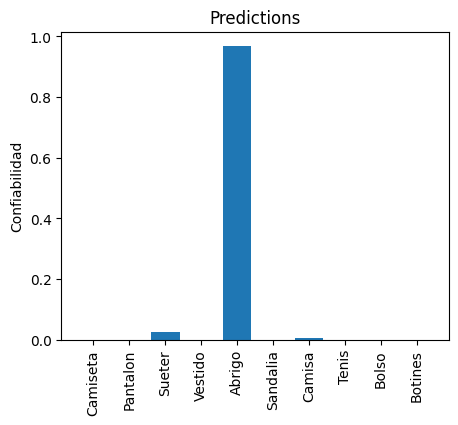

In [73]:
# Plot Predictions
index = np.arange(len(class_name))
plt.figure(figsize=(5,4))
plt.bar(index, images_prediction[0])
plt.ylabel('Confiabilidad')
plt.xticks(index, class_name, rotation=90)
plt.title('Predictions')
plt.show()

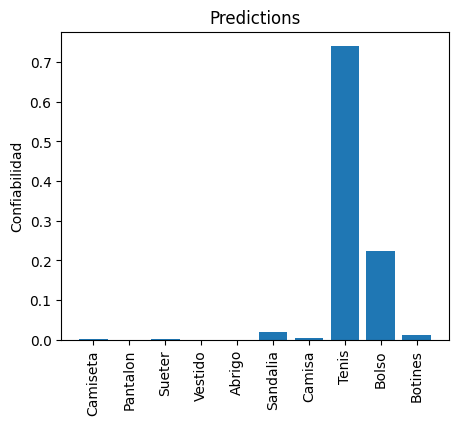

In [74]:
# Plot Predictions
index = np.arange(len(class_name))
plt.figure(figsize=(5,4))
plt.bar(index, images_prediction[2])
plt.ylabel('Confiabilidad')
plt.xticks(index, class_name, rotation=90)
plt.title('Predictions')
plt.show()

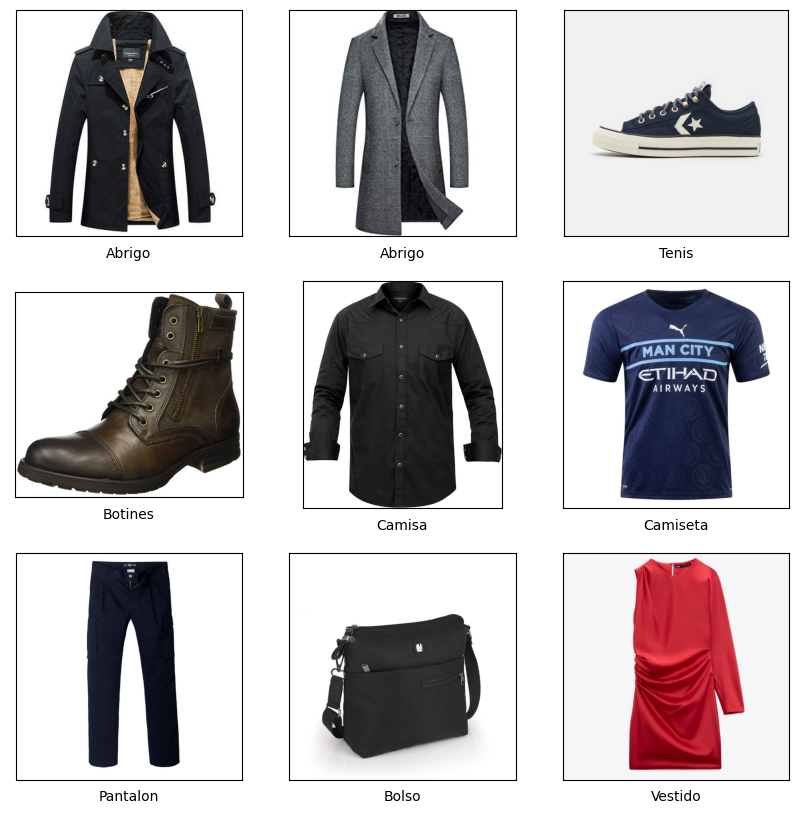

In [60]:
# Multiplot with labels
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(original_images_list[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[np.argmax(images_prediction[i])])
    
plt.show()